# Giới thiệu Bokeh

Bài toán phân tích mối quan hệ giữa khí thải co2 so GDP của từng nước, từng khu vực.

In [ ]:
# from google.colab import drive
# drive.moun('/content/drive')

# # Khuyến khích khi file có kích thước nhỏ


In [ ]:
# Khi gặp file lớn

# !gdown --id 1vBREeQ9YrdjkeajyUIvedqkd6d0dhWM1

Downloading...
From: https://drive.google.com/uc?id=1vBREeQ9YrdjkeajyUIvedqkd6d0dhWM1
To: /content/gapminder.csv
100% 734k/734k [00:00<00:00, 4.50MB/s]


In [ ]:
# # Install thư viện bokeh
# !pip install bokeh

# 1. Preparing Dataset

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Read data co2
co2_path = 'co2.csv'
co2 = pd.read_csv(co2_path)
co2


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.169,0.155,0.183,0.163,0.168,0.133,0.152,0.165,0.204,0.235,0.298,0.271,0.272,0.248,0.236,0.213,0.188,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.910,2.010,2.270,2.530,2.890,1.930,2.680,2.620,2.680,2.700,2.660,2.650,2.380,2.290,2.760,1.680,1.310,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.920,2.280,2.370,3.430,2.430,3.440,2.330,1.910,2.480,3.250,3.230,3.280,3.520,3.410,3.170,2.970,2.980,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.470,7.180,6.9100,6.7400,6.490,6.6600,7.070,7.2400,7.6600,7.9800,8.0200,7.790,7.5900,7.3200,7.3600,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.920,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.575,0.416,0.435,0.646,0.637,0.599,0.571,0.485,0.515,0.487,0.443,0.427,0.518,0.446,0.424,0.420,0.405,0.4010,0.4310,0.281,0.7690,0.712,0.4890,0.4710,0.5740,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.780,4.170,4.510,4.730,5.130,5.920,5.830,5.770,5.600,5.460,5.780,6.100,6.020,6.140,5.610,6.150,5.680,5.1000,5.8500,5.980,6.0100,5.420,5.8000,7.1000,7.2000,6.2200,6.920,7.6100,7.4300,5.7600,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030
188,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.447,0.280,0.300,0.296,0.306,0.309,0.319,0.323,0.331,0.294,0.347,0.370,0.407,0.355,0.262,0.314,0.308,0.3020,0.3170,0.355,0.3870,0.454,0.5820,0.6060,0.6010,0.6680,0.754,0.8640,0.9520,1.0800,1.1600,1.2100,1.2200,1.360,1.470,1.610,1.700,1.570,1.610,1.800
189,Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318,0.365,0.410,0.412,0.412,0.409,0.502,0.679,0.695,0.757,0.879,0.808,0.817,0.869,0.867,0.796,0.727,0.7470,0.6210,0.617,0.6830,0.669,0.8140,0.7220,0.800

In [ ]:
# Read data GDP
gm_path = 'gapminder.csv'
gm = pd.read_csv(gm_path)
gm


,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia
...,...,...,...,...,...,...,...,...
10106,Åland,2002,NaN,81.800,26257.0,NaN,NaN,Europe & Central Asia
10107,Åland,2003,NaN,80.630,26347.0,NaN,NaN,Europe & Central Asia
10108,Åland,2004,NaN,79.880,26530.0,NaN,NaN,Europe & Central Asia
10109,Åland,2005,NaN,80.000,26766.0,NaN,NaN,Europe & Central Asia


In [ ]:
# Các bước tiền xử lý.

In [ ]:
df_gm = gm[['Country', 'region']].drop_duplicates()
df_gm

,Country,region
0,Afghanistan,South Asia
50,Albania,Europe & Central Asia
100,Algeria,Middle East & North Africa
150,Angola,Sub-Saharan Africa
200,Antigua and Barbuda,America
...,...,...
9901,Western Sahara,Middle East & North Africa
9951,"Yemen, Rep.",Middle East & North Africa
10001,Zambia,Sub-Saharan Africa
10051,Zimbabwe,Sub-Saharan Africa


In [ ]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how: str = 'inner', on=None, left_on=None, right_on=None, left_index: bool = False, right_index: bool = False, sort: bool = False, suffixes=('_x', '_y'), copy: bool = True, indicator: bool = False, validate=None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right fra

In [ ]:
# Merge co2 , df_gm
df_w_regions = pd.merge(co2, df_gm, left_on='country', right_on='Country', how='inner')
df_w_regions


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,Country,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.183,0.163,0.168,0.133,0.152,0.165,0.204,0.235,0.298,0.271,0.272,0.248,0.236,0.213,0.188,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,Afghanistan,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.270,2.530,2.890,1.930,2.680,2.620,2.680,2.700,2.660,2.650,2.380,2.290,2.760,1.680,1.310,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Albania,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.370,3.430,2.430,3.440,2.330,1.910,2.480,3.250,3.230,3.280,3.520,3.410,3.170,2.970,2.980,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Algeria,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.435,0.646,0.637,0.599,0.571,0.485,0.515,0.487,0.443,0.427,0.518,0.446,0.424,0.420,0.405,0.4010,0.4310,0.281,0.7690,0.712,0.4890,0.4710,0.5740,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Angola,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.390,6.700,5.540,1.950,1.460,4.050,1.180,2.070,3.570,3.620,4.050,4.270,4.290,4.230,3.980,3.8600,3.8800,3.730,3.7400,3.880,3.9600,4.0000,4.0300,4.1200,4.100,4.2900,4.6200,4.7800,4.8100,4.9100,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,Antigua and Barbuda,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.483,0.536,0.554,0.539,0.433,0.423,0.443,0.433,0.931,0.441,0.350,0.474,0.436,0.450,0.438,0.4020,0.3900,0.380,0.3920,0.491,0.4820,0.4530,0.4650,0.4560,0.465,0.4350,0.4240,0.2870,0.2800,0.2220,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,Vanuatu,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.510,4.730,5.130,5.920,5.830,5.770,5.600,5.460,5.780,6.100,6.020,6.140,5.610,6.150,5.680,5.1000,5.8500,5.980,6.0100,5.420,5.8000,7.1000,7.2000,6.2200,6.920,7.6100,7.4300,5.7600,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,Venezuela,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0

In [ ]:
# Columns country trùng với Country
df_w_regions = df_w_regions.drop('Country', axis='columns')
df_w_regions

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,region
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.155,0.183,0.163,0.168,0.133,0.152,0.165,0.204,0.235,0.298,0.271,0.272,0.248,0.236,0.213,0.188,0.0997,0.0891,0.080,0.0727,0.066,0.0597,0.0552,0.0423,0.0385,0.039,0.0487,0.0518,0.0394,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.350,0.316,0.299,South Asia
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.010,2.270,2.530,2.890,1.930,2.680,2.620,2.680,2.700,2.660,2.650,2.380,2.290,2.760,1.680,1.310,0.7760,0.7320,0.613,0.6720,0.652,0.4990,0.5650,0.9580,0.9680,1.030,1.2000,1.3800,1.3400,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.680,1.730,1.960,Europe & Central Asia
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.280,2.370,3.430,2.430,3.440,2.330,1.910,2.480,3.250,3.230,3.280,3.520,3.410,3.170,2.970,2.980,2.9500,2.9600,3.050,3.3000,3.300,2.9200,3.5300,2.9900,2.8200,2.670,2.8100,2.8300,2.7000,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.460,3.510,3.720,Middle East & North Africa
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.416,0.435,0.646,0.637,0.599,0.571,0.485,0.515,0.487,0.443,0.427,0.518,0.446,0.424,0.420,0.405,0.4010,0.4310,0.281,0.7690,0.712,0.4890,0.4710,0.5740,0.5800,0.573,0.7210,0.4980,0.9960,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.330,1.250,1.290,Sub-Saharan Africa
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.580,6.390,6.700,5.540,1.950,1.460,4.050,1.180,2.070,3.570,3.620,4.050,4.270,4.290,4.230,3.980,3.8600,3.8800,3.730,3.7400,3.880,3.9600,4.0000,4.0300,4.1200,4.100,4.2900,4.6200,4.7800,4.8100,4.9100,5.1400,5.190,5.450,5.540,5.360,5.420,5.360,5.380,America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.427,0.483,0.536,0.554,0.539,0.433,0.423,0.443,0.433,0.931,0.441,0.350,0.474,0.436,0.450,0.438,0.4020,0.3900,0.380,0.3920,0.491,0.4820,0.4530,0.4650,0.4560,0.465,0.4350,0.4240,0.2870,0.2800,0.2220,0.4500,0.423,0.524,0.512,0.546,0.459,0.420,0.595,East Asia & Pacific
169,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.170,4.510,4.730,5.130,5.920,5.830,5.770,5.600,5.460,5.780,6.100,6.020,6.140,5.610,6.150,5.680,5.1000,5.8500,5.980,6.0100,5.420,5.8000,7.1000,7.2000,6.2200,6.920,7.6100,7.4300,5.7600,6.1600,6.2200,5.8100,6.360,6.290,6.510,6.000,6.650,6.070,6.030,America
170,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.280,0.300,0.296,0.306,0.309,0.319

In [ ]:
new_co2 = pd.melt(df_w_regions, id_vars=['country', 'region'])
new_co2

,country,region,variable,value
0,Afghanistan,South Asia,1800,NaN
1,Albania,Europe & Central Asia,1800,NaN
2,Algeria,Middle East & North Africa,1800,NaN
3,Angola,Sub-Saharan Africa,1800,NaN
4,Antigua and Barbuda,America,1800,NaN
...,...,...,...,...
37190,Vanuatu,East Asia & Pacific,2014,0.595
37191,Venezuela,America,2014,6.030
37192,Vietnam,East Asia & Pacific,2014,1.800
37193,Zambia,Sub-Saharan Africa,2014,0.288


In [ ]:
# Đổi tên columns
columns = ['country', 'region', 'year', 'co2']
new_co2.columns = columns
#rename.
new_co2


,country,region,year,co2
0,Afghanistan,South Asia,1800,NaN
1,Albania,Europe & Central Asia,1800,NaN
2,Algeria,Middle East & North Africa,1800,NaN
3,Angola,Sub-Saharan Africa,1800,NaN
4,Antigua and Barbuda,America,1800,NaN
...,...,...,...,...
37190,Vanuatu,East Asia & Pacific,2014,0.595
37191,Venezuela,America,2014,6.030
37192,Vietnam,East Asia & Pacific,2014,1.800
37193,Zambia,Sub-Saharan Africa,2014,0.288


In [ ]:
# Xử lý new_co2, lấy year >= 1964
df_co2 = new_co2[new_co2['year'].astype('int64') > 1963]
df_co2
df_co2 = df_co2.sort_values(by=['country', 'year'])
# Chuyển đổi kiểu dữ liệu của cột year -> int
df_co2['year'] = df_co2['year'].astype('int64')
df_co2.head()


,country,region,year,co2
28372,Afghanistan,South Asia,1964,0.0863
28545,Afghanistan,South Asia,1965,0.1010
28718,Afghanistan,South Asia,1966,0.1080
28891,Afghanistan,South Asia,1967,0.1240
29064,Afghanistan,South Asia,1968,0.1160


In [ ]:
# Lấy các cột cần thiết 
df_gdp = gm[['Country', 'Year', 'gdp']]
df_gdp.columns = ['country', 'year', 'gdp']
df_gdp.head()


,country,year,gdp
0,Afghanistan,1964,1182.0
1,Afghanistan,1965,1182.0
2,Afghanistan,1966,1168.0
3,Afghanistan,1967,1173.0
4,Afghanistan,1968,1187.0


In [ ]:
# Merge
data = pd.merge(df_co2, df_gdp, on=['country', 'year'], how='left')
data

,country,region,year,co2,gdp
0,Afghanistan,South Asia,1964,0.0863,1182.0
1,Afghanistan,South Asia,1965,0.1010,1182.0
2,Afghanistan,South Asia,1966,0.1080,1168.0
3,Afghanistan,South Asia,1967,0.1240,1173.0
4,Afghanistan,South Asia,1968,0.1160,1187.0
...,...,...,...,...,...
8818,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0
8819,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0
8820,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0
8821,Zimbabwe,Sub-Saharan Africa,2013,0.7760,1773.0


In [ ]:
# Loại bỏ missing value
data = data.dropna() # 1 trong những cách xử lý missing value.
data


,country,region,year,co2,gdp
0,Afghanistan,South Asia,1964,0.0863,1182.0
1,Afghanistan,South Asia,1965,0.1010,1182.0
2,Afghanistan,South Asia,1966,0.1080,1168.0
3,Afghanistan,South Asia,1967,0.1240,1173.0
4,Afghanistan,South Asia,1968,0.1160,1187.0
...,...,...,...,...,...
8817,Zimbabwe,Sub-Saharan Africa,2009,0.4060,1352.0
8818,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0
8819,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0
8820,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0


In [ ]:
# Correction 
np_co2 = np.array(data['co2'])
np_gdp = np.array(data['gdp'])
np.corrcoef(np_co2, np_gdp)


array([[1.        , 0.78219731],
       [0.78219731, 1.        ]])

# Bokeh

# Tạo 1 base stacic plot  

In [ ]:
from bokeh.io import curdoc, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row

In [ ]:
output_notebook()

In [ ]:
# Từ data mình xử lý.
regions_list = data.region.unique().tolist()
color_mapper = CategoricalColorMapper(factors=regions_list, palette=Spectral6)


In [ ]:
# Make the ColumnDataSource: source
source = ColumnDataSource(data={
    'x': data.gdp[data['year'] == 1964],
    'y': data.co2[data['year'] == 1964],
    'country': data.country[data['year'] == 1964],
    'region': data.region[data['year'] == 1964],
})



In [ ]:
# Save the minimum and maximum values of the gdp column: xmin, xmax
xmin, xmax = min(data.gdp), max(data.gdp)

# Save the minimum and maximum values of the co2 column: ymin, ymax
ymin, ymax = min(data.co2), max(data.co2)


In [ ]:
# Create the figure: plot
plot = figure(title='CO2 Emissions vs GDP in 1964', 
              plot_height=600, plot_width=1000,
              x_range=(xmin, xmax),
              y_range=(ymin, ymax))#, y_axis_type='log')


In [ ]:
# Add circle glyphs to the plot
plot.circle(x='x', y='y', fill_alpha=0.8, source=source, legend='region',
            color=dict(field='region', transform=color_mapper),
            size=7)


/usr/local/lib/python3.7/dist-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'legend' keyword is deprecated, use explicit 'legend_label', 'legend_field', or 'legend_group' keywords instead



GlyphRenderer(id='2593', ...)

In [ ]:
# Set the legend.location attribute of the plot
plot.legend.location = 'bottom_right'

# Set the x-axis label
plot.xaxis.axis_label = 'Income Per Person'

# Set the y-axis label
plot.yaxis.axis_label = 'CO2 Emissions (tons per person)'


In [ ]:
show(plot)

# 3. Tạo 1 slider

In [ ]:
min(data.year), max(data.year)

(1964, 2014)

In [ ]:
# Make a slider object: slider
slider = Slider(start=min(data.year), end=max(data.year), step=1, value=min(data.year), title='Year')


def update_plot(attr, old, new):
    # set the `yr` name to `slider.value` and `source.data = new_data`
    yr = slider.value

    new_data = {
        'x': data.gdp[data['year'] == yr],
        'y': data.co2[data['year'] == yr],
        'country': data.country[data['year'] == yr],
        'region': data.region[data['year'] == yr],
    }
    source.data = new_data

    # Add title to figure: plot.title.text
    plot.title.text = 'CO2 Emissions vs GDP in %d' % yr


# Attach the callback to the 'value' property of slider
slider.on_change('value', update_plot)

In [ ]:

layout = row(widgetbox(slider), plot)
curdoc().add_root(layout)


/usr/local/lib/python3.7/dist-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'WidgetBox' is deprecated and will be removed in Bokeh 3.0, use 'bokeh.models.Column' instead



In [ ]:
# Lệnh chạy.
# bokeh serve --show name_of_your_notebook.ipynb/name_file.py

Bokeh show_app is currently unsupported


# Tạo Hower Tool

In [ ]:

# Create a HoverTool: hover
hover = HoverTool(tooltips=[('Country', '@country'), ('GDP', '@x'), ('CO2 Emission', '@y')])

# Add the HoverTool to the plot
plot.add_tools(hover)


In [ ]:
# Make a row layout of widgetbox(slider) and plot and add it to the current document
layout = row(widgetbox(slider), plot)
curdoc().add_root(layout)


/usr/local/lib/python3.7/dist-packages/bokeh/util/deprecation.py:75: BokehDeprecationWarning:

'WidgetBox' is deprecated and will be removed in Bokeh 3.0, use 'bokeh.models.Column' instead



In [ ]:
# Lệnh chạy.
# Tắt curdoc().add_root(layout) ở slider
# bokeh serve --show name_of_your_notebook.ipynb/name_file.py

# Interractive scatter plot

In [ ]:
import pandas as pd
import plotly.express as px

# document plotly. 

In [ ]:
data

,country,region,year,co2,gdp
0,Afghanistan,South Asia,1964,0.0863,1182.0
1,Afghanistan,South Asia,1965,0.1010,1182.0
2,Afghanistan,South Asia,1966,0.1080,1168.0
3,Afghanistan,South Asia,1967,0.1240,1173.0
4,Afghanistan,South Asia,1968,0.1160,1187.0
...,...,...,...,...,...
8818,Zimbabwe,Sub-Saharan Africa,2010,0.5520,1484.0
8819,Zimbabwe,Sub-Saharan Africa,2011,0.6650,1626.0
8820,Zimbabwe,Sub-Saharan Africa,2012,0.5300,1750.0
8821,Zimbabwe,Sub-Saharan Africa,2013,0.7760,1773.0


In [ ]:
fig = px.scatter(data, x="gdp", y="co2", animation_frame="year", animation_group="country",
           color="region", hover_name="country", facet_col="region", width=1579, height=400,
           log_x=True, size_max=45, range_x=[xmin,xmax], range_y=[ymin,ymax])

fig.show()


In [ ]:
#Check doc
help(px.scatter)

Help on function scatter in module plotly.express._chart_types:

scatter(data_frame=None, x=None, y=None, color=None, symbol=None, size=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders={}, labels={}, color_discrete_sequence=None, color_discrete_map={}, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, symbol_sequence=None, symbol_map={}, opacity=None, size_max=None, marginal_x=None, marginal_y=None, trendline=None, trendline_color_override=None, log_x=False, log_y=False, range_x=None, range_y=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a scatter plot, each row of `data_frame` is represented by a symbol
        mark in 2D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
     

# Bài tập

1. Chạy lại tiền xử lý để ra co2 và gdp dataframe

2. Tạo 1 scatter với x-axes và y-axes là "year" và "co2", Thêm 1 box plot cho "co2" values với **marginaly_y** parametes.

3. Tạo 1 rug plot cho **gdp** values với **marginal_x** parametes, và thêm animation parameters trên cột **year**

4. Tạo 1 scatter plot với x-axes, y-axes lần lượt là "gdp" và "co2"

5. Tạo 1 desity contour với x-axes, y-axes lần lượt là "gdp" và "co2".

Sau bước 2


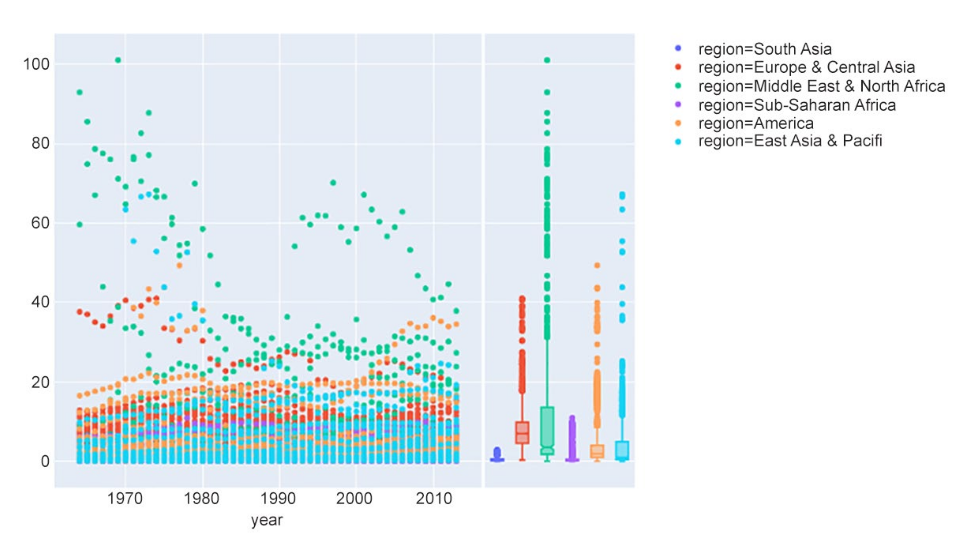

Sau bước 3


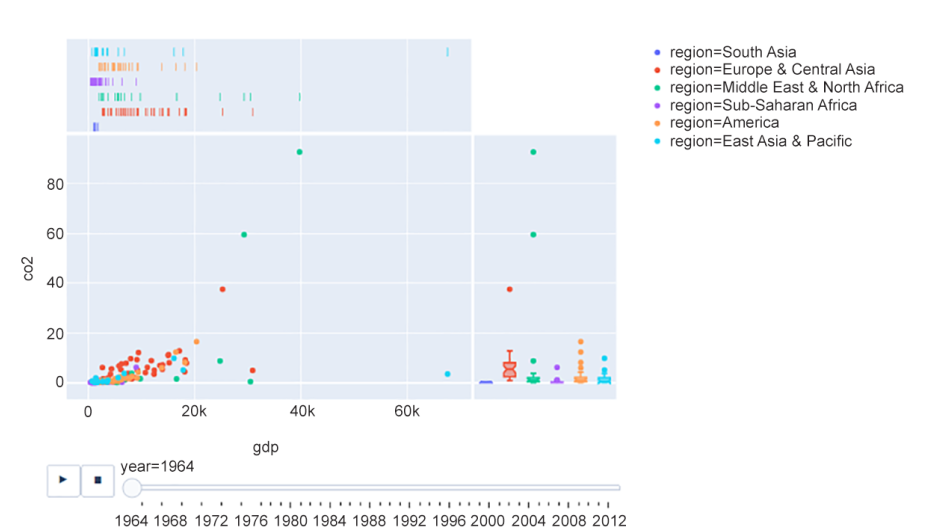

Sau bước 5


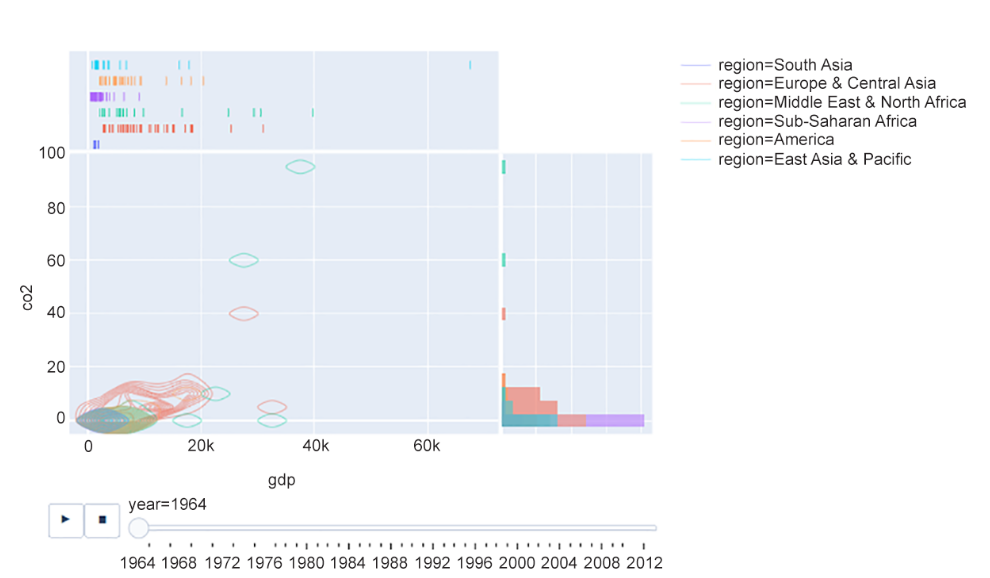

In [137]:
#@title Hints
import cv2
from google.colab.patches import cv2_imshow
print('Sau bước 2')
cv2_imshow(cv2.imread('/content/Screenshot from 2021-11-07 18-28-05.png'))
print('Sau bước 3')
cv2_imshow(cv2.imread('/content/Screenshot from 2021-11-07 18-28-14.png'))
print('Sau bước 5')
cv2_imshow(cv2.imread('/content/Screenshot from 2021-11-07 18-28-20.png'))
